In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [53]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [55]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [56]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending_Score"})
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


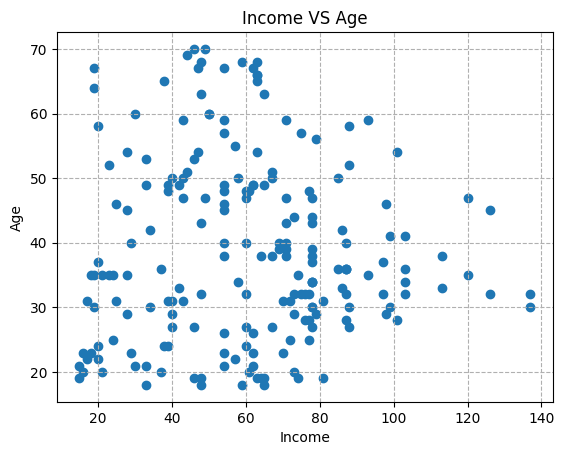

In [57]:
plt.scatter(df['Income'], df['Age'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

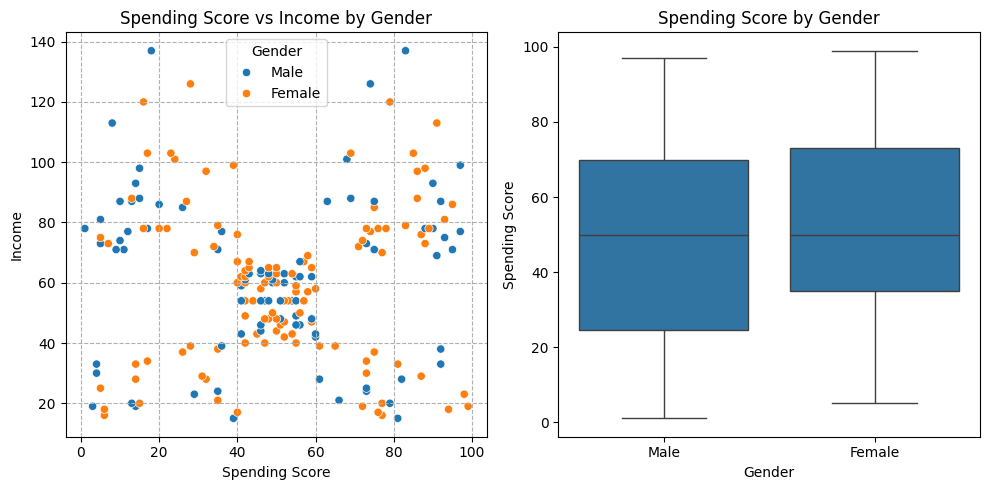

In [58]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Spending_Score', y='Income', hue='Gender', data=df)
plt.title('Spending Score vs Income by Gender')
plt.xlabel('Spending Score')
plt.ylabel('Income')
plt.grid(axis='both', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()
# terbentuk sebuah group kelompok sendiri

In [59]:
# create new dataframe that consist only annual income and spending score
df = df[['Gender','Age', 'Income', 'Spending_Score']]
df.head()

,Gender,Age,Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data Scaling

In [66]:
# Lakukan pemetaan manual pada kolom 'Gender'
# Male -> 0, Female -> 1
df_encoded = df.copy() # Buat salinan agar tidak memodifikasi df asli jika df digunakan di tempat lain
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Tampilkan beberapa baris pertama untuk melihat hasilnya
print("Data setelah pemetaan Gender:")
display(df_encoded.head())

Data setelah pemetaan Gender:


,Gender,Age,Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


,Gender,Age,Income,Spending_Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


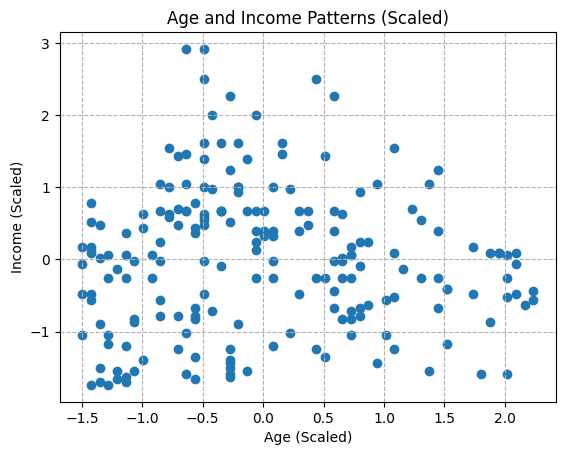

In [67]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Menggunakan DataFrame yang sudah di-one-hot encode (df_encoded) sebagai input untuk scaling
# df_encoded sekarang berisi kolom numerik asli dan kolom biner Gender_Male
# Pastikan semua kolom di df_encoded adalah numerik sebelum scaling
# (one-hot encoding dengan dtype=int sudah memastikan ini)
scaled_data = sc.fit_transform(df_encoded)

# Buat DataFrame dengan nama kolom yang sesuai dari df_encoded
df_sc_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

display(df_sc_scaled.head())

# visualization (Anda bisa memilih 2 variabel untuk visualisasi 2D, misalnya Age dan Income)
# Gunakan kolom dari df_sc_scaled
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"])
plt.xlabel("Age (Scaled)")
plt.ylabel("Income (Scaled)")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns (Scaled)")
plt.show()

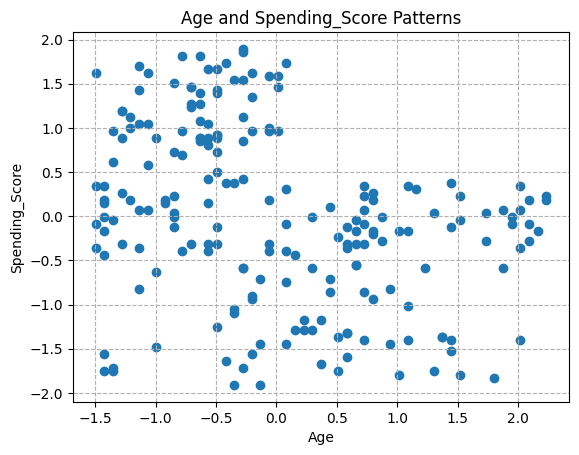

In [68]:
# visualization
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Spending_Score"])
plt.xlabel("Age")
plt.ylabel("Spending_Score")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Spending_Score Patterns")
plt.show()

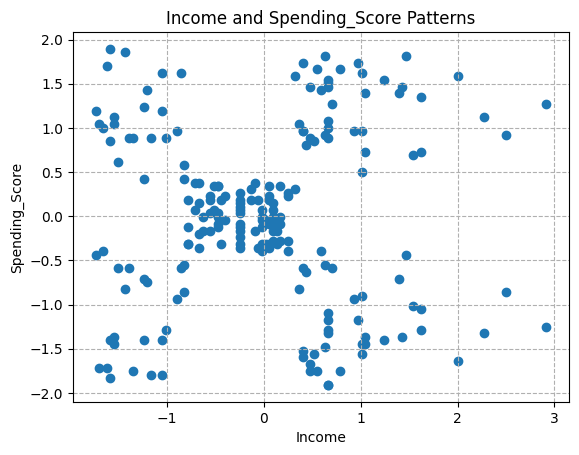

In [69]:
# visualization
sns.scatterplot(x='Income', y='Spending_Score', hue='Gender', data=df)
plt.xlabel("Income")
plt.ylabel("Spending_Score")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Spending_Score Patterns by Gender")
plt.show()

# K-Means Clustering

In [70]:
from sklearn.cluster import KMeans

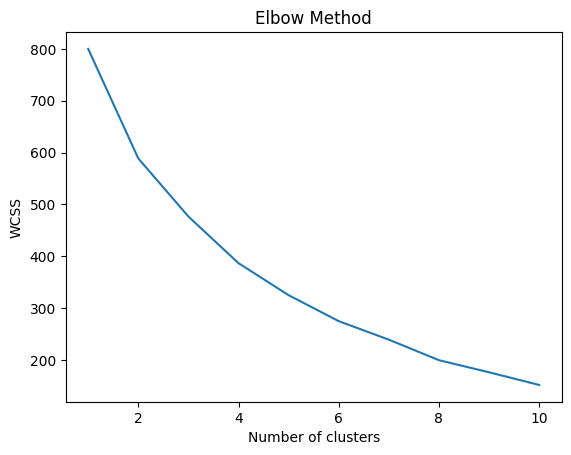

In [71]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [72]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  800.000000
1                   2  588.802677
2                   3  476.787554
3                   4  386.828426
4                   5  325.094980
5                   6  275.030671
6                   7  239.327862
7                   8  199.750461
8                   9  176.419096
9                  10  152.029834


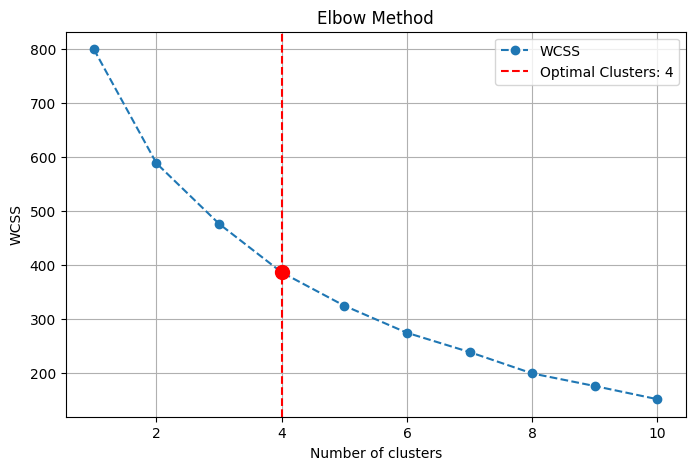

The optimal number of clusters is: 4


In [74]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [75]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Income,Spending_Score,KMeans_Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,2


/tmp/ipython-input-304132749.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


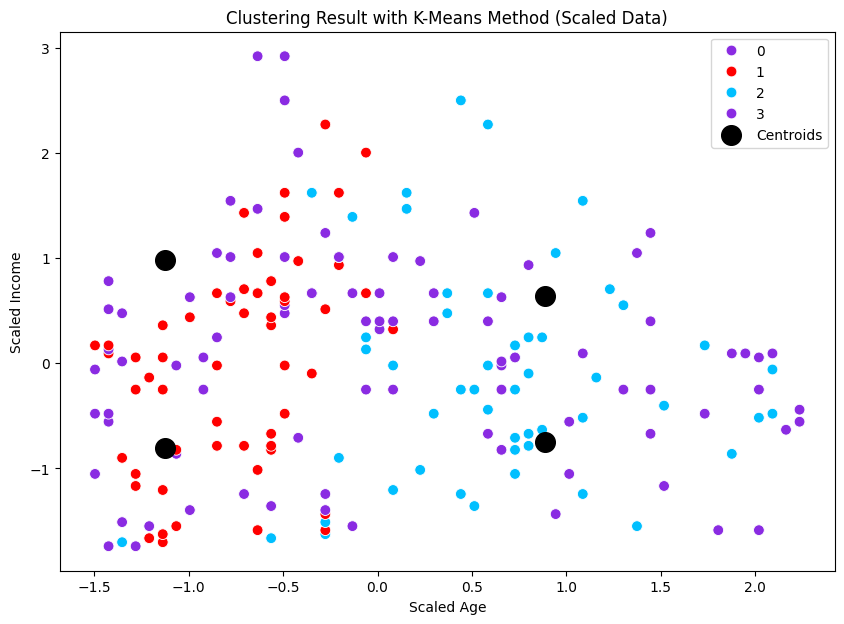

In [80]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

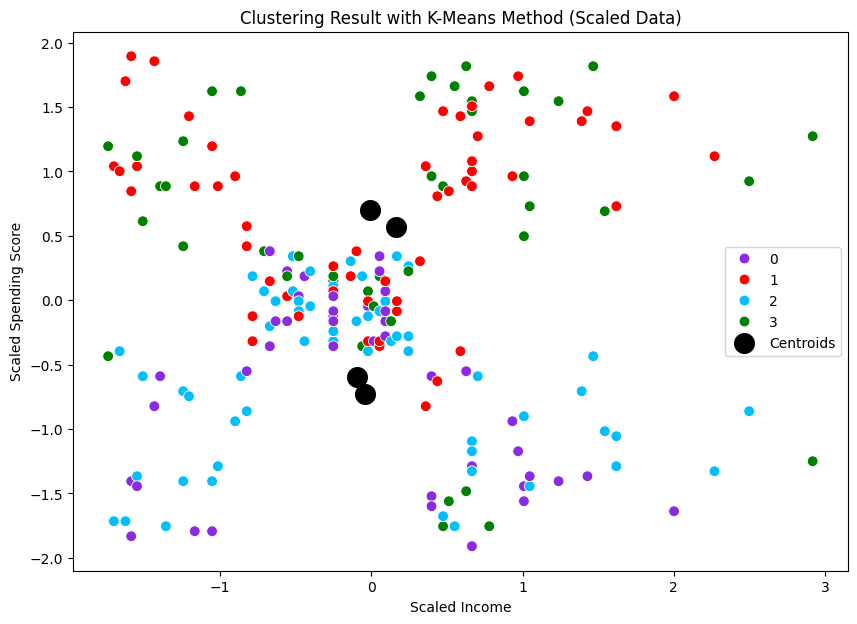

In [78]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Spending_Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "green"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, df_sc_scaled.columns.get_loc("Income")], kmeans.cluster_centers_[:, df_sc_scaled.columns.get_loc("Spending_Score")], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

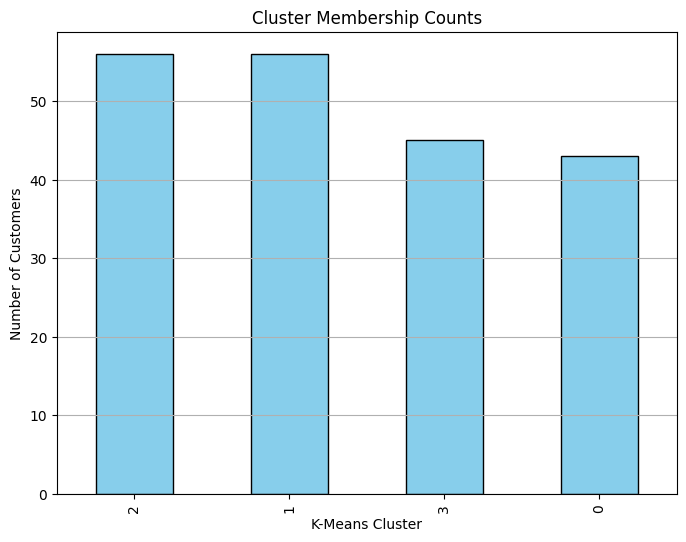

In [81]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [86]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
# Remove Gender from mean/min/max aggregation as it's not numeric
cluster_summary = df.groupby('KMeans_Cluster').agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max'],
                                              'Spending_Score': ['mean', 'min', 'max'],
                                              'Gender': 'count' # Count instances of each gender per cluster
                                              })

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

display(cluster_summary)

Age             Income          Spending_Score          \
                     mean min max       mean min  max           mean min max   
KMeans_cluster                                                                 
0               52.511628  33  70  59.395349  19  113      31.441860   1  60   
1               28.392857  18  40  60.428571  16  120      68.178571  29  99   
2               47.803571  20  68  58.071429  16  126      34.875000   5  59   
3               27.666667  18  40  64.933333  15  137      64.822222   5  97   

                  Gender  
                <lambda>  
KMeans_cluster            
0                 [Male]  
1               [Female]  
2               [Female]  
3                 [Male]

- Cluster 0 – Mature & Low Spending

Profil:

Usia rata-rata: 52 tahun, pendapatan menengah (≈59k)

Spending Score rendah (≈31)

Mayoritas pria

Managerial Implications:

Segmen ini tidak konsumtif, cenderung hemat atau membeli produk esensial.

Fokus pada produk kebutuhan utama atau paket loyalitas jangka panjang.

Gunakan kanal promosi tradisional (email, newsletter, event).

Diskon volume atau poin loyalti bisa meningkatkan engagement.

- Cluster 1 – Young & High Spenders

Profil:

Usia muda (≈28 tahun), pendapatan menengah (≈60k)

Spending Score tinggi (≈68)

Mayoritas wanita

Managerial Implications:

Segmen paling konsumtif, cocok untuk produk fashion, lifestyle, atau premium experience.

Fokus pada media sosial & influencer marketing.

Gunakan limited edition atau flash sale.

Strategi retensi lewat pengalaman personal (rewards, VIP access).

- Cluster 2 – Working Professionals, Moderate Spenders

Profil:

Usia menengah (≈48 tahun), pendapatan sedang (≈58k)

Spending Score menengah ke bawah (≈35)

Mayoritas wanita

Managerial Implications:

Segmen stabil secara finansial tapi tidak konsumtif.

Tawarkan produk bernilai tinggi (value-for-money).

Gunakan promosi berbasis kebutuhan keluarga atau pekerjaan.

Retensi melalui program membership atau benefit tambahan.

- Cluster 3 – Young & Active Spenders

Profil:

Usia muda (≈27 tahun), pendapatan cukup tinggi (≈65k)

Spending Score tinggi (≈65)

Mayoritas pria

Managerial Implications:

Segmen dinamis & tech-savvy, responsif terhadap promosi online.

Gunakan digital ads, mobile apps, gamified promotions.

Cocok untuk produk gaya hidup modern / teknologi.

Retensi dengan program loyalty berbasis poin atau challenge.